#Filtros - DSP 1

Elisa Anes Romero

Especificação do Filtro Passa-Alta

Frequência de amostragem:

fs = 8 kHz
Banda Passante:

fp = 3.2 kHz com ondulação máxima de 1 dB

Banda de Rejeição:

fr = 2.8 kHz com atenuação mínima de 52 dB

Aproximações:

FIR: Janela de Kaiser e outra janela a ser escolhida para atender à especificação.

IIR: Protótipos Chebyshev Tipo II e Elíptico.

<ipython-input-36-cf8c842ceaa2>:31: RuntimeWarning: divide by zero encountered in log10
  ax.plot(f, 20 * np.log10(H), 'r', label="Especificação do Filtro")


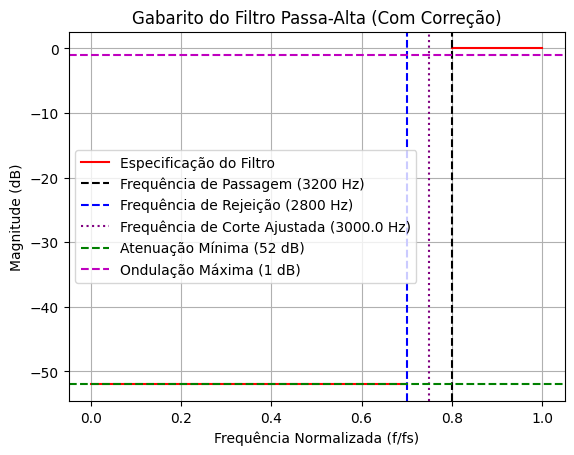

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Frequências em Hz
fs = 8000  # Frequência de amostragem
fp = 3200  # Frequência de passagem
fr = 2800  # Frequência de rejeição (agora usando fr)

# Normalização das frequências (dividindo por fs/2 para obter unidades de pi)
wp = fp / (fs / 2)
ws = fr / (fs / 2)

wc = (wp + ws) / 2  # Média das frequências de passagem e rejeição

# Especificações em dB
Rp = 1   # Ondulação na banda passante
As = 52  # Atenuação mínima na banda de rejeição

# Criando o gráfico do gabarito do filtro
fig, ax = plt.subplots()

# Faixa de frequência normalizada
f = np.linspace(0, 1, 1000)

# Construção do gabarito corrigido
H = np.zeros_like(f)
H[f >= wp] = 1  # Banda passante
H[f <= ws] = 10**(-As / 20)  # Banda de rejeição

# Plotando o gabarito com a correção da frequência de corte
ax.plot(f, 20 * np.log10(H), 'r', label="Especificação do Filtro")
ax.axvline(wp, color='k', linestyle="--", label=f"Frequência de Passagem ({fp} Hz)")
ax.axvline(ws, color='b', linestyle="--", label=f"Frequência de Rejeição ({fr} Hz)")
ax.axvline(wc, color='purple', linestyle=":", label=f"Frequência de Corte Ajustada ({wc * fs/2:.1f} Hz)")
ax.axhline(-As, color='g', linestyle="--", label=f"Atenuação Mínima ({As} dB)")
ax.axhline(-Rp, color='m', linestyle="--", label=f"Ondulação Máxima ({Rp} dB)")

# Configurações do gráfico
ax.set_xlabel("Frequência Normalizada (f/fs)")
ax.set_ylabel("Magnitude (dB)")
ax.set_title("Gabarito do Filtro Passa-Alta (Com Correção)")
ax.legend()
ax.grid()

# Exibir o gráfico
plt.show()


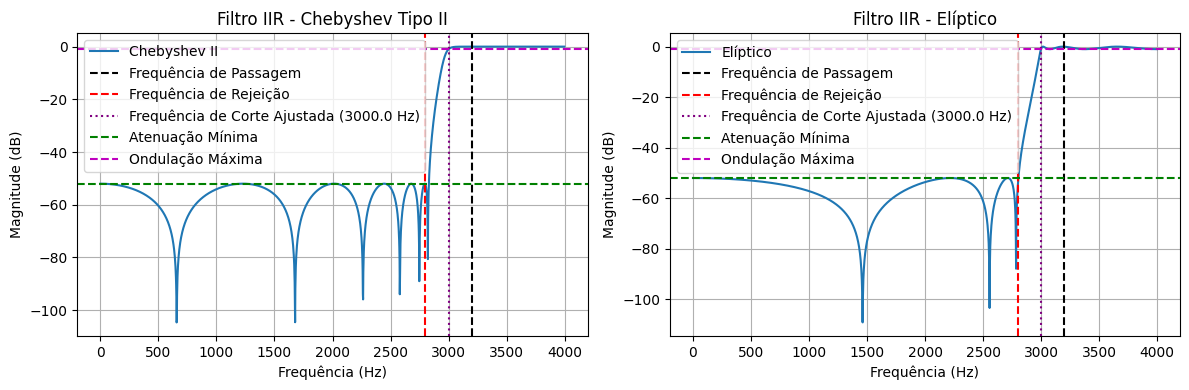

In [35]:
# IIR
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Função para cálculo da resposta em frequência
def freqz_m(b, a):
    w, H = signal.freqz(b, a, worN=2048)
    db = 20 * np.log10(np.abs(H))
    return w, db

# Especificações do filtro digital
fs = 8000  # Frequência de amostragem (Hz)
fp = 3200  # Frequência de passagem (Hz)
fr = 2800  # Frequência de rejeição (Hz)
wp = fp / (fs / 2)  # Normalização
ws = fr / (fs / 2)  # Normalização

wc = (wp + ws) / 2  # Média das frequências de passagem e rejeição

Rp = 1  # Ondulação máxima na banda passante (dB)
As = 52  # Atenuação mínima na banda de rejeição (dB)

# --- Filtro IIR Chebyshev Tipo II ---
N_cheb2, wn_cheb2 = signal.cheb2ord(wc, ws, Rp, As)  # Correção para wc
b_cheb2, a_cheb2 = signal.cheby2(N_cheb2, As, wn_cheb2, btype='high', analog=False)

# --- Filtro IIR Elíptico ---
N_ellip, wn_ellip = signal.ellipord(wc, ws, Rp, As)  # Correção para wc
b_ellip, a_ellip = signal.ellip(N_ellip, Rp, As, wn_ellip, btype='high', analog=False)

# --- Respostas em frequência dos filtros IIR ---
w, h_cheb2 = freqz_m(b_cheb2, a_cheb2)
w, h_ellip = freqz_m(b_ellip, a_ellip)

# --- Gráficos ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(w/np.pi*fs/2, h_cheb2, label='Chebyshev II')
axs[1].plot(w/np.pi*fs/2, h_ellip, label='Elíptico')

for ax in axs:
    ax.axvline(fp, color='k', linestyle="--", label="Frequência de Passagem")
    ax.axvline(fr, color='r', linestyle="--", label="Frequência de Rejeição")
    ax.axvline(wc * fs / 2, color='purple', linestyle=":", label=f"Frequência de Corte Ajustada ({wc * fs/2:.1f} Hz)")
    ax.axhline(-As, color='g', linestyle="--", label="Atenuação Mínima")
    ax.axhline(-Rp, color='m', linestyle="--", label="Ondulação Máxima")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Magnitude (dB)")
    ax.legend()
    ax.grid()

axs[0].set_title("Filtro IIR - Chebyshev Tipo II")
axs[1].set_title("Filtro IIR - Elíptico")

plt.tight_layout()
plt.show()


In [24]:
import numpy as np
from scipy import signal

# Especificações do filtro
fs = 8000  # Frequência de amostragem
wp = 3200 / (fs / 2)  # Normalização da frequência de passagem
ws = 2800 / (fs / 2)  # Normalização da frequência de rejeição

wc = (wp + ws) / 2  # Média das frequências de passagem e rejeição

Rp = 1  # Ondulação máxima na banda passante (dB)
As = 52  # Atenuação mínima na banda de rejeição (dB)

# Projeto do Filtro IIR - Chebyshev Tipo II
N_cheb2, wn_cheb2 = signal.cheb2ord(wc, ws, Rp, As)  # Usando wc corrigido
b_cheb2, a_cheb2 = signal.cheby2(N_cheb2, As, wn_cheb2, btype='high')

# Exibição dos coeficientes
print("Coeficientes b (numerador) - IIR Chebyshev Tipo II:")
print(b_cheb2)
print("\nCoeficientes a (denominador) - IIR Chebyshev Tipo II:")
print(a_cheb2)

# Projeto do Filtro IIR - Elíptico
N_ellip, wn_ellip = signal.ellipord(wc, ws, Rp, As)  # Usando wc corrigido
b_ellip, a_ellip = signal.ellip(N_ellip, Rp, As, wn_ellip, btype='high')

# Exibição dos coeficientes
print("\nCoeficientes b (numerador) - IIR Elíptico:")
print(b_ellip)
print("\nCoeficientes a (denominador) - IIR Elíptico:")
print(a_ellip)


Coeficientes b (numerador) - IIR Chebyshev Tipo II:
[0.00812108 0.01106071 0.02824358 0.01642418 0.03042055 0.00332468
 0.02401118 0.00332468 0.03042055 0.01642418 0.02824358 0.01106071
 0.00812108]

Coeficientes a (denominador) - IIR Chebyshev Tipo II:
[1.00000000e+00 4.63122959e+00 1.11881357e+01 1.75033062e+01
 1.95503191e+01 1.61851274e+01 1.01466141e+01 4.81292054e+00
 1.71517427e+00 4.43459739e-01 7.99086850e-02 8.66571984e-03
 5.19853097e-04]

Coeficientes b (numerador) - IIR Elíptico:
[0.00804062 0.00950439 0.01878194 0.01255636 0.01878194 0.00950439
 0.00804062]

Coeficientes a (denominador) - IIR Elíptico:
[1.         4.32086512 8.61179918 9.89746923 6.87570122 2.73068699
 0.48629508]


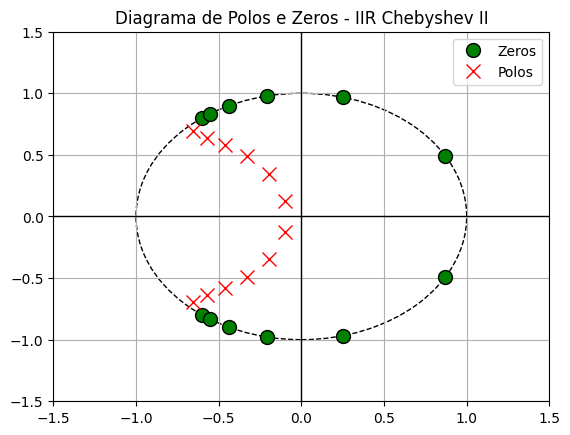

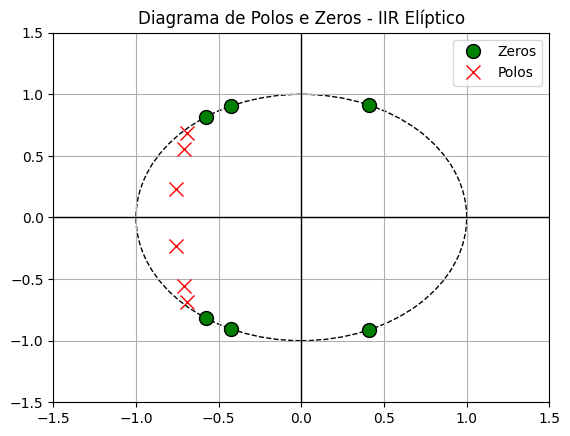



O diagrama de polos e zeros mostra a distribuição dos polos (X em vermelho) 
e zeros (O em verde) no plano Z. 
No caso dos filtros IIR:
Os polos devem estar dentro do círculo unitário para garantir estabilidade.
Os zeros determinam a atenuação na banda de rejeição. 
No filtro Chebyshev Tipo II, os zeros são colocados estrategicamente na banda de 
rejeição para criar maior atenuação.



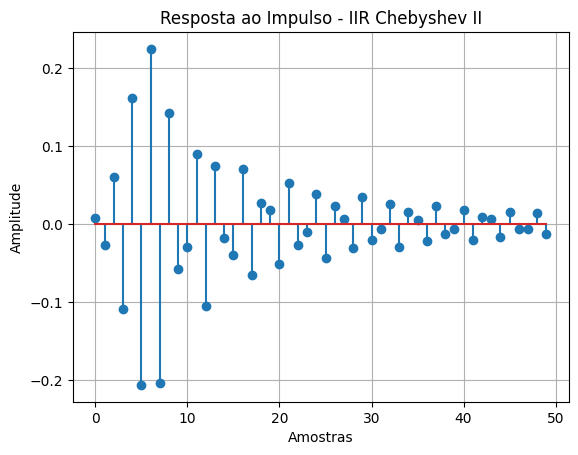


A resposta ao impulso representa como o filtro responde a um pulso unitário.
Para filtros IIR, a resposta não se torna zero rapidamente, pois há realimentação.
Isso demonstra que filtros IIR são recursivos, e a resposta ao impulso 
pode ser infinita em duração.


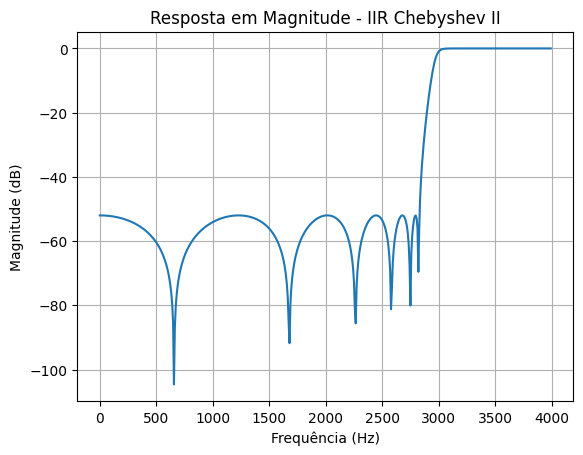


A resposta em magnitude mostra:
A atenuação na banda de rejeição.
A passagem de frequências acima de 3200 Hz (filtro passa-alta).
As ondulações na banda passante, típicas do Chebyshev Tipo II.


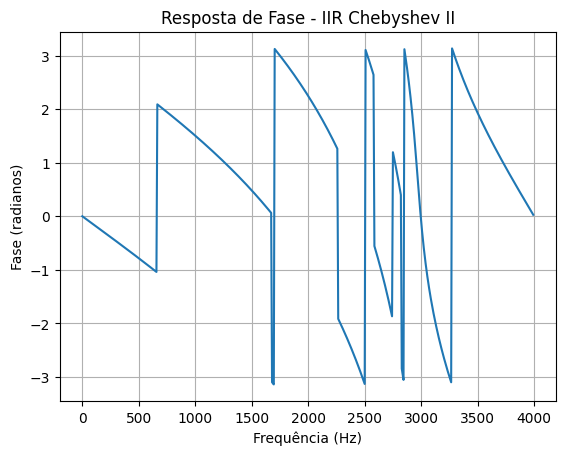


A resposta de fase indica como o filtro altera a fase das frequências de entrada.
Nos filtros IIR, a fase pode ser não linear, o que pode causar distorção na 
forma de onda do sinal processado.


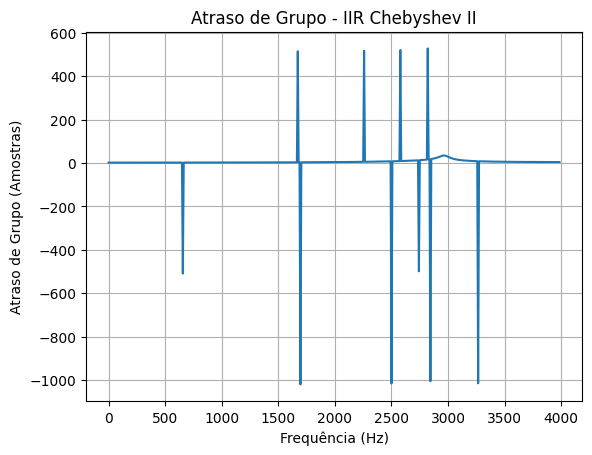


O atraso de grupo mostra quanto cada frequência é atrasada pelo filtro.
Para filtros IIR, o atraso pode ser não constante, o que afeta a 
fidelidade do sinal processado.


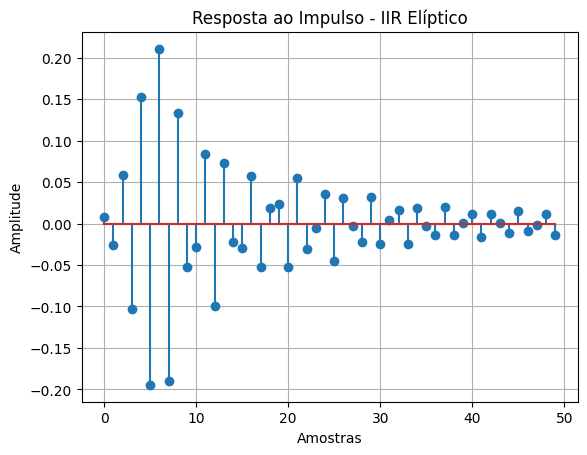

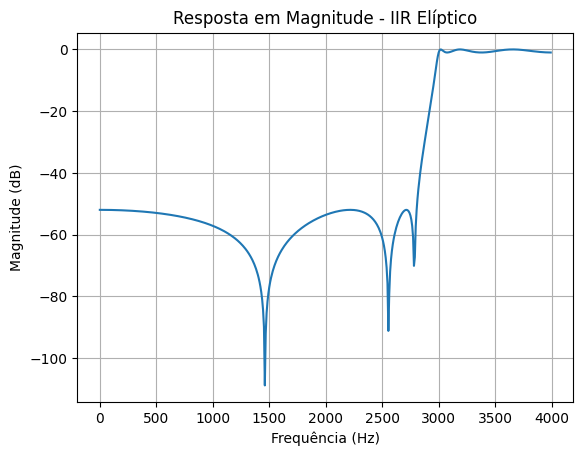


A resposta em magnitude do filtro Elíptico é mais 
seletiva que a do Chebyshev Tipo II.
Ele apresenta atenuação mais abrupta na banda de transição, tornando-se 
eficiente para aplicações onde se deseja uma transição curta entre a 
banda de rejeição e a de passagem.


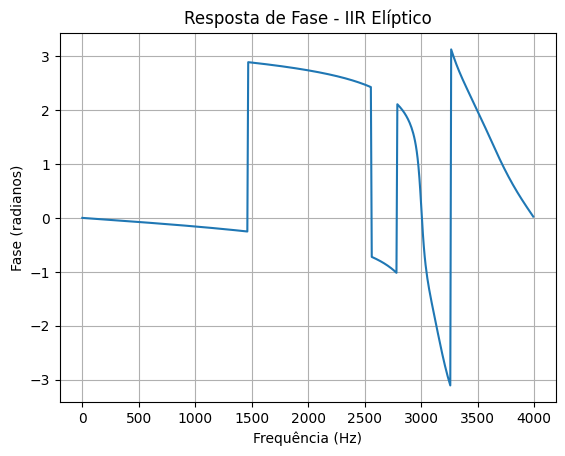


Como os filtros IIR não têm fase linear, pode haver 
distorções de fase. Isso pode ser um problema para sinais que 
precisam manter a forma original, como sinais de áudio.


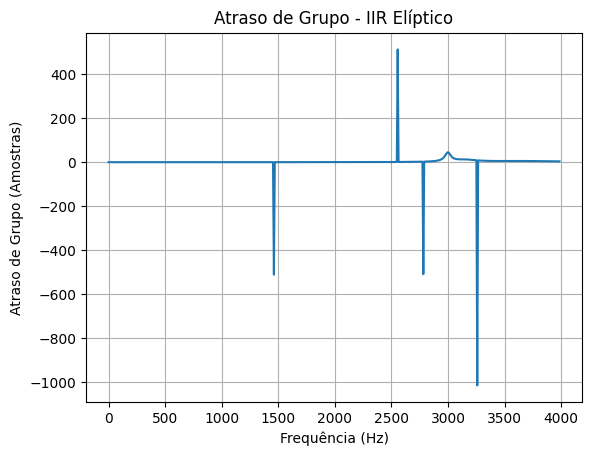


O atraso de grupo não é constante, o que significa que diferentes 
frequências são atrasadas de forma diferente. Isso pode causar distorção da 
forma de onda.


In [34]:
#Diagrama de polos e zeros (IIR)
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def zplane(b, a, title="Diagrama de Polos e Zeros"):
    """Plota o diagrama de polos e zeros do filtro."""
    from matplotlib import patches
    fig, ax = plt.subplots()
    ax.add_patch(patches.Circle((0, 0), radius=1, fill=False, color='black', ls='dashed'))

    p = np.roots(a)
    z = np.roots(b)

    ax.plot(z.real, z.imag, 'go', ms=10, markeredgecolor='k', markerfacecolor='g', label="Zeros")
    ax.plot(p.real, p.imag, 'rx', ms=10, markeredgecolor='r', markerfacecolor='r', label="Polos")

    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_title(title)
    ax.legend()
    plt.grid()
    plt.show()

# Especificações do filtro IIR
fs = 8000  # Frequência de amostragem
fp = 3200  # Frequência de passagem
fr = 2800  # Frequência de rejeição
wp = fp / (fs / 2)  # Normalização
ws = fr / (fs / 2)  # Normalização

wc = (wp + ws) / 2  # Média das frequências de passagem e rejeição

Rp = 1  # Ondulação máxima na banda passante (dB)
As = 52  # Atenuação mínima na banda de rejeição (dB)

# --- Filtro IIR Chebyshev Tipo II ---
N_cheb2, wn_cheb2 = signal.cheb2ord(wc, ws, Rp, As)
b_cheb2, a_cheb2 = signal.cheby2(N_cheb2, As, wn_cheb2, btype='high')

# --- Filtro IIR Elíptico ---
N_ellip, wn_ellip = signal.ellipord(wc, ws, Rp, As)
b_ellip, a_ellip = signal.ellip(N_ellip, Rp, As, wn_ellip, btype='high')

# --- Gerar o diagrama de polos e zeros ---
zplane(b_cheb2, a_cheb2, title="Diagrama de Polos e Zeros - IIR Chebyshev II")
zplane(b_ellip, a_ellip, title="Diagrama de Polos e Zeros - IIR Elíptico")

# Criando um impulso unitário para resposta ao impulso
impulse = np.zeros(50)
impulse[0] = 1

print("\n")
print("""O diagrama de polos e zeros mostra a distribuição dos polos (X em vermelho)
e zeros (O em verde) no plano Z.
No caso dos filtros IIR:
Os polos devem estar dentro do círculo unitário para garantir estabilidade.
Os zeros determinam a atenuação na banda de rejeição.
No filtro Chebyshev Tipo II, os zeros são colocados estrategicamente na banda de
rejeição para criar maior atenuação.\n""")

# Resposta ao impulso (IIR Chebyshev II)
response_cheb2 = signal.lfilter(b_cheb2, a_cheb2, impulse)
plt.figure()
plt.stem(response_cheb2)
plt.title("Resposta ao Impulso - IIR Chebyshev II")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print("""\nA resposta ao impulso representa como o filtro responde a um pulso unitário.
Para filtros IIR, a resposta não se torna zero rapidamente, pois há realimentação.
Isso demonstra que filtros IIR são recursivos, e a resposta ao impulso
pode ser infinita em duração.""")

# Resposta em magnitude (IIR Chebyshev II)
w, H_cheb2 = signal.freqz(b_cheb2, a_cheb2)
plt.figure()
plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(H_cheb2)))
plt.title("Resposta em Magnitude - IIR Chebyshev II")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

print("""\nA resposta em magnitude mostra:
A atenuação na banda de rejeição.
A passagem de frequências acima de 3200 Hz (filtro passa-alta).
As ondulações na banda passante, típicas do Chebyshev Tipo II.""")

# Resposta de fase (IIR Chebyshev II)
plt.figure()
plt.plot(w / np.pi * fs / 2, np.angle(H_cheb2))
plt.title("Resposta de Fase - IIR Chebyshev II")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fase (radianos)")
plt.grid()
plt.show()

print("""\nA resposta de fase indica como o filtro altera a fase das frequências de entrada.
Nos filtros IIR, a fase pode ser não linear, o que pode causar distorção na
forma de onda do sinal processado.""")

# Atraso de grupo (IIR Chebyshev II)
group_delay_cheb2 = -np.diff(np.angle(H_cheb2)) / np.diff(w)
plt.figure()
plt.plot(w[:-1] / np.pi * fs / 2, group_delay_cheb2)
plt.title("Atraso de Grupo - IIR Chebyshev II")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Atraso de Grupo (Amostras)")
plt.grid()
plt.show()

print("""\nO atraso de grupo mostra quanto cada frequência é atrasada pelo filtro.
Para filtros IIR, o atraso pode ser não constante, o que afeta a
fidelidade do sinal processado.""")

# Resposta ao impulso (IIR Elíptico)
response_ellip = signal.lfilter(b_ellip, a_ellip, impulse)
plt.figure()
plt.stem(response_ellip)
plt.title("Resposta ao Impulso - IIR Elíptico")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Resposta em magnitude (IIR Elíptico)
w, H_ellip = signal.freqz(b_ellip, a_ellip)
plt.figure()
plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(H_ellip)))
plt.title("Resposta em Magnitude - IIR Elíptico")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

print("""\nA resposta em magnitude do filtro Elíptico é mais
seletiva que a do Chebyshev Tipo II.
Ele apresenta atenuação mais abrupta na banda de transição, tornando-se
eficiente para aplicações onde se deseja uma transição curta entre a
banda de rejeição e a de passagem.""")

# Resposta de fase (IIR Elíptico)
plt.figure()
plt.plot(w / np.pi * fs / 2, np.angle(H_ellip))
plt.title("Resposta de Fase - IIR Elíptico")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fase (radianos)")
plt.grid()
plt.show()


print("""\nComo os filtros IIR não têm fase linear, pode haver
distorções de fase. Isso pode ser um problema para sinais que
precisam manter a forma original, como sinais de áudio.""")

# Atraso de grupo (IIR Elíptico)
group_delay_ellip = -np.diff(np.angle(H_ellip)) / np.diff(w)
plt.figure()
plt.plot(w[:-1] / np.pi * fs / 2, group_delay_ellip)
plt.title("Atraso de Grupo - IIR Elíptico")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Atraso de Grupo (Amostras)")
plt.grid()
plt.show()

print("""\nO atraso de grupo não é constante, o que significa que diferentes
frequências são atrasadas de forma diferente. Isso pode causar distorção da
forma de onda.""")



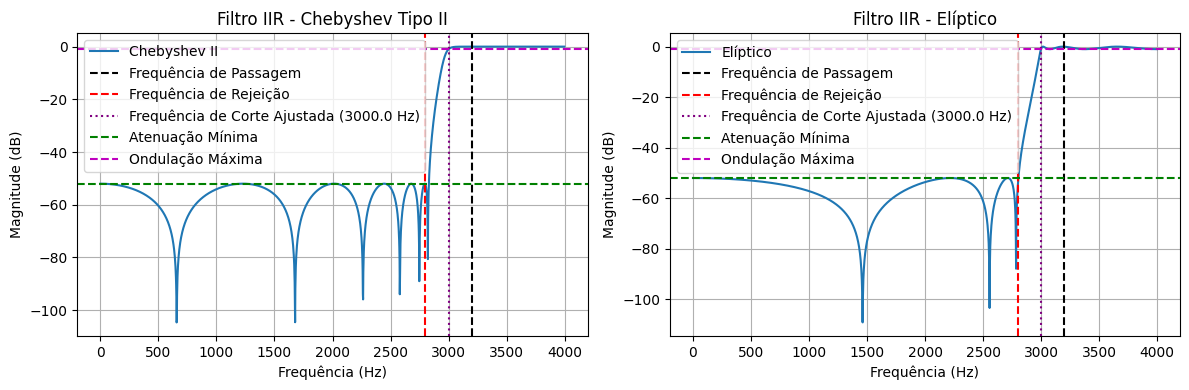

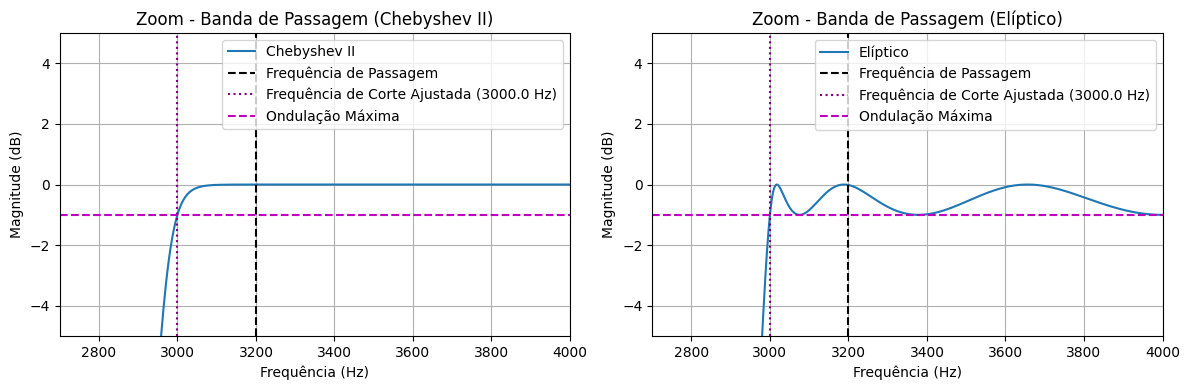

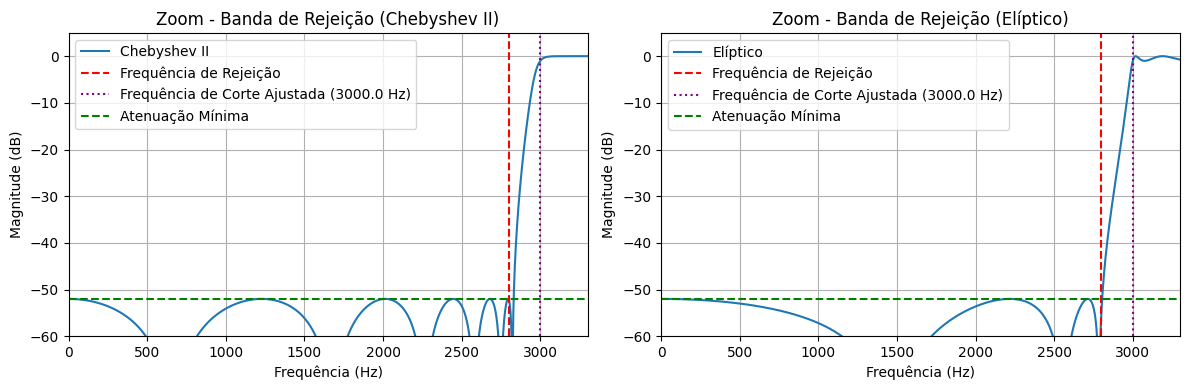

In [33]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Função para cálculo da resposta em frequência
def freqz_m(b, a):
    w, H = signal.freqz(b, a, worN=2048)
    db = 20 * np.log10(np.abs(H))
    return w, db

# Especificações do filtro digital
fs = 8000  # Frequência de amostragem (Hz)
fp = 3200  # Frequência de passagem (Hz)
fr = 2800  # Frequência de rejeição (Hz)
wp = fp / (fs / 2)  # Normalização
ws = fr / (fs / 2)  # Normalização

wc = (wp + ws) / 2  # Média das frequências de passagem e rejeição

Rp = 1  # Ondulação máxima na banda passante (dB)
As = 52  # Atenuação mínima na banda de rejeição (dB)

# --- Filtro IIR Chebyshev Tipo II ---
N_cheb2, wn_cheb2 = signal.cheb2ord(wc, ws, Rp, As)  # Correção para wc
b_cheb2, a_cheb2 = signal.cheby2(N_cheb2, As, wn_cheb2, btype='high', analog=False)

# --- Filtro IIR Elíptico ---
N_ellip, wn_ellip = signal.ellipord(wc, ws, Rp, As)  # Correção para wc
b_ellip, a_ellip = signal.ellip(N_ellip, Rp, As, wn_ellip, btype='high', analog=False)

# --- Respostas em frequência dos filtros IIR ---
w, h_cheb2 = freqz_m(b_cheb2, a_cheb2)
w, h_ellip = freqz_m(b_ellip, a_ellip)

# --- Gráficos da Resposta em Magnitude ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(w/np.pi*fs/2, h_cheb2, label='Chebyshev II')
axs[1].plot(w/np.pi*fs/2, h_ellip, label='Elíptico')

for ax in axs:
    ax.axvline(fp, color='k', linestyle="--", label="Frequência de Passagem")
    ax.axvline(fr, color='r', linestyle="--", label="Frequência de Rejeição")
    ax.axvline(wc * fs / 2, color='purple', linestyle=":", label=f"Frequência de Corte Ajustada ({wc * fs/2:.1f} Hz)")
    ax.axhline(-As, color='g', linestyle="--", label="Atenuação Mínima")
    ax.axhline(-Rp, color='m', linestyle="--", label="Ondulação Máxima")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Magnitude (dB)")
    ax.legend()
    ax.grid()

axs[0].set_title("Filtro IIR - Chebyshev Tipo II")
axs[1].set_title("Filtro IIR - Elíptico")

plt.tight_layout()
plt.show()

# --- Zoom na Banda de Passagem ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(w/np.pi*fs/2, h_cheb2, label='Chebyshev II')
axs[1].plot(w/np.pi*fs/2, h_ellip, label='Elíptico')

for ax in axs:
    ax.set_xlim([fp - 500, fs/2])  # Zoom na banda de passagem
    ax.set_ylim([-5, 5])  # Mantém o foco nos valores relevantes
    ax.axvline(fp, color='k', linestyle="--", label="Frequência de Passagem")
    ax.axvline(wc * fs / 2, color='purple', linestyle=":", label=f"Frequência de Corte Ajustada ({wc * fs/2:.1f} Hz)")
    ax.axhline(-Rp, color='m', linestyle="--", label="Ondulação Máxima")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Magnitude (dB)")
    ax.legend()
    ax.grid()

axs[0].set_title("Zoom - Banda de Passagem (Chebyshev II)")
axs[1].set_title("Zoom - Banda de Passagem (Elíptico)")

plt.tight_layout()
plt.show()

# --- Zoom na Banda de Rejeição ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(w/np.pi*fs/2, h_cheb2, label='Chebyshev II')
axs[1].plot(w/np.pi*fs/2, h_ellip, label='Elíptico')

for ax in axs:
    ax.set_xlim([0, fr + 500])  # Zoom na banda de rejeição
    ax.set_ylim([-60, 5])  # Mantém o foco nos valores relevantes
    ax.axvline(fr, color='r', linestyle="--", label="Frequência de Rejeição")
    ax.axvline(wc * fs / 2, color='purple', linestyle=":", label=f"Frequência de Corte Ajustada ({wc * fs/2:.1f} Hz)")
    ax.axhline(-As, color='g', linestyle="--", label="Atenuação Mínima")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Magnitude (dB)")
    ax.legend()
    ax.grid()

axs[0].set_title("Zoom - Banda de Rejeição (Chebyshev II)")
axs[1].set_title("Zoom - Banda de Rejeição (Elíptico)")

plt.tight_layout()
plt.show()


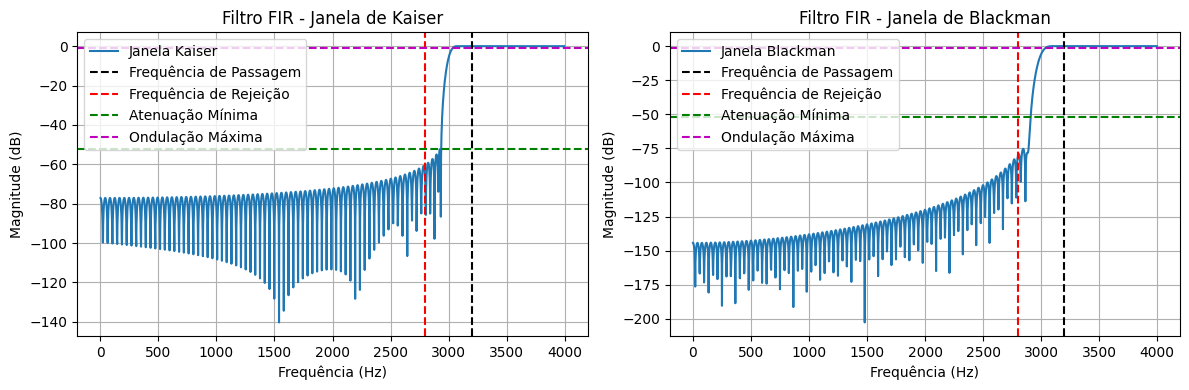

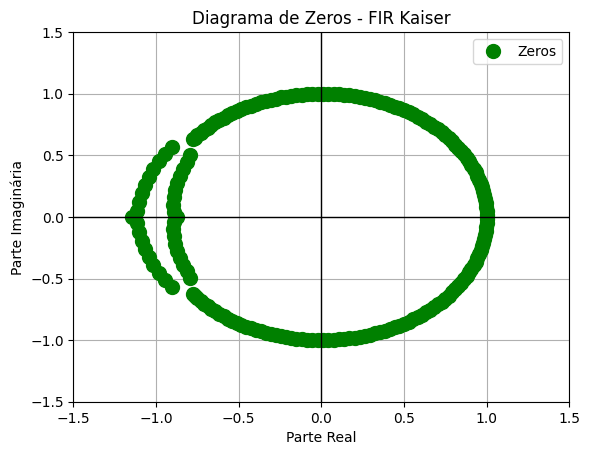




Filtros FIR não têm polos significativos, apenas zeros.
Os zeros são usados para definir a atenuação na banda de rejeição.


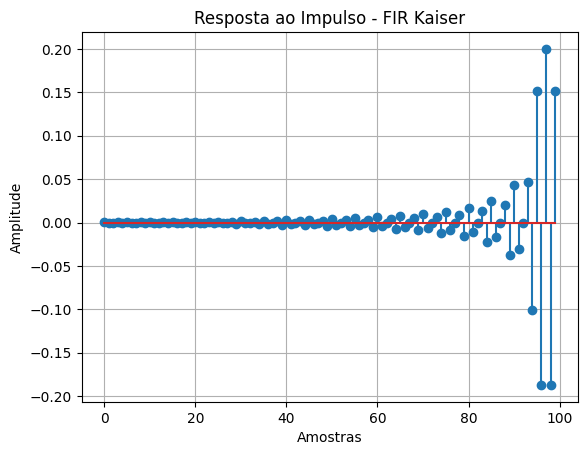


A resposta ao impulso do FIR é finita e não tem realimentação.
Isso significa ausência de instabilidades e fase linear.


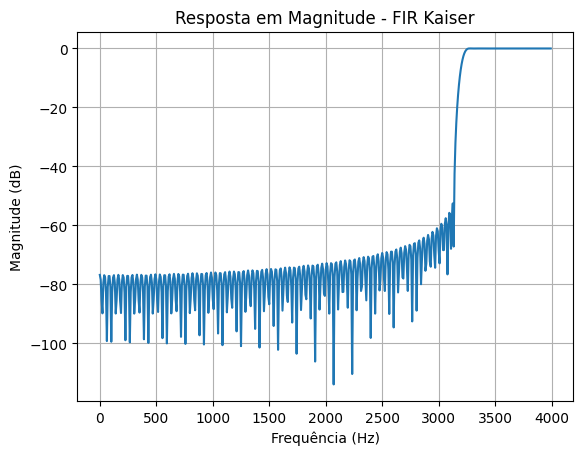


Atenuação da banda de rejeição muito boa.
Transição mais suave comparado ao IIR.


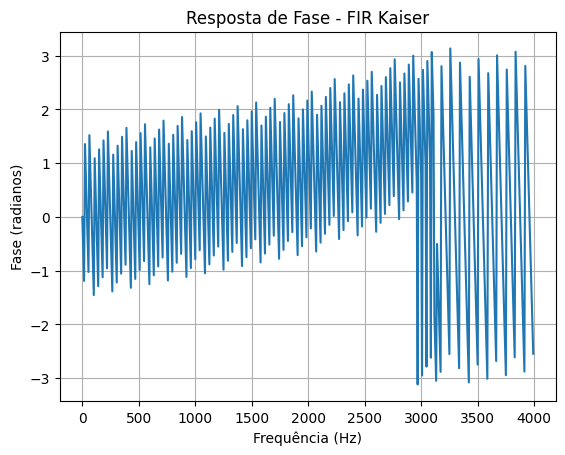


Filtros FIR possuem fase linear, o que evita distorções na forma de onda.


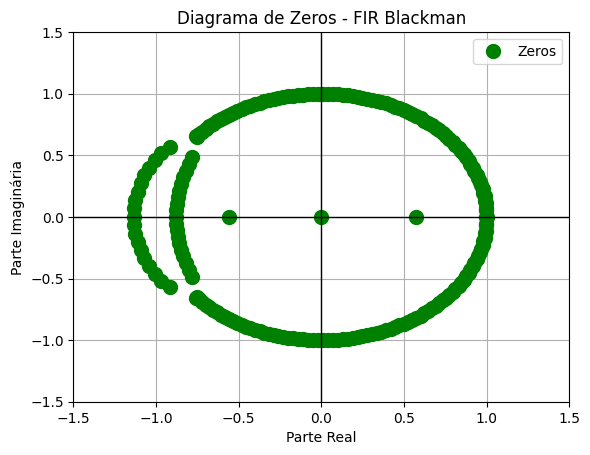


O filtro FIR Blackman só tem zeros, pois não há realimentação.
A distribuição dos zeros controla a atenuação na banda de rejeição.


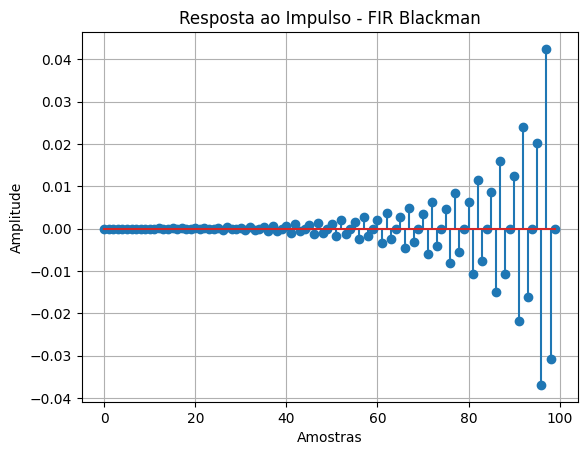


O FIR Blackman tem resposta ao impulso finita, significando 
que não há realimentação. Isso resulta em fase linear, que preserva a 
forma do sinal.


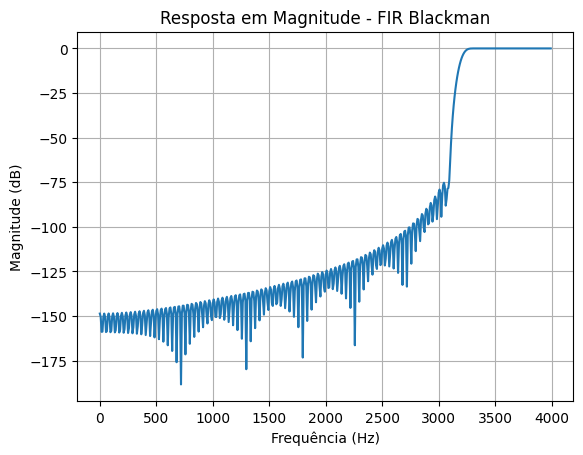


Transição suave da banda de rejeição para a banda passante.
Mais coeficientes são necessários para obter boa atenuação.


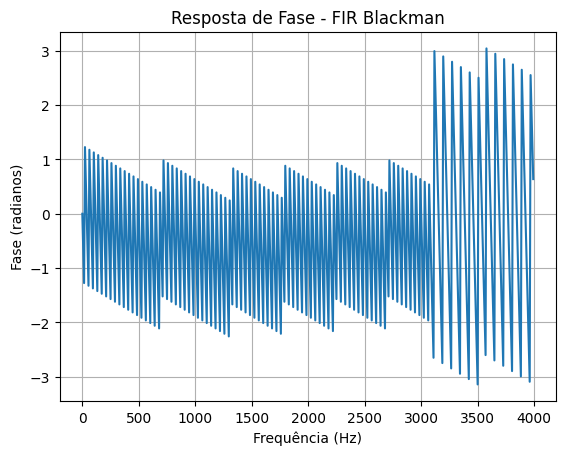


A fase é linear, garantindo baixa distorção.


In [32]:
#FIR
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Função para cálculo da resposta em frequência
def freqz_m(b, a):
    w, H = signal.freqz(b, a, worN=2048)
    db = 20 * np.log10(np.abs(H))
    return w, db

# Criando um sinal impulso unitário (delta de Dirac discreto)
impulse = np.zeros(100)  # Vetor de 100 amostras inicializado com zeros
impulse[0] = 1  # Definir a primeira amostra como 1 (impulso unitário)

# Especificações do filtro digital
fs = 8000  # Frequência de amostragem (Hz)
fp = 3200  # Frequência de passagem (Hz)
fr = 2800  # Frequência de rejeição (Hz)
wp = fp / (fs / 2)  # Normalização
ws = fr / (fs / 2)  # Normalização
Rp = 1  # Ondulação máxima na banda passante (dB)
As = 52  # Atenuação mínima na banda de rejeição (dB)

wc = (wp + ws) / 2  # frequência de corte

# --- Filtro FIR com Janela de Kaiser ---
tr_width = wp - ws
M_kaiser = int(np.ceil((As - 7.95) / (2.285 * tr_width))) + 1
if M_kaiser % 2 == 0:
    M_kaiser += 1
beta = 0.1102 * (As - 8.7)
h_kaiser = signal.firwin(M_kaiser, wc, window=('kaiser', beta), pass_zero=False)

# --- Filtro FIR com Janela de Blackman ---
M_blackman = int(np.ceil(6.6 * np.pi / tr_width)) + 1
if M_blackman % 2 == 0:
    M_blackman += 1
h_blackman = signal.firwin(M_blackman, wc, window='blackman', pass_zero=False)

# --- Respostas em frequência dos filtros FIR ---
w, H_kaiser = freqz_m(h_kaiser, 1)
w, H_blackman = freqz_m(h_blackman, 1)

# Design dos filtros FIR
b_kaiser = signal.firwin(M_kaiser, wc, window=('kaiser', beta), pass_zero=False)
b_blackman = signal.firwin(M_blackman, wc, window="blackman", pass_zero=False)

# --- Gráficos ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(w/np.pi*fs/2, H_kaiser, label='Janela Kaiser')
axs[1].plot(w/np.pi*fs/2, H_blackman, label='Janela Blackman')

for ax in axs:
    ax.axvline(fp, color='k', linestyle="--", label="Frequência de Passagem")
    ax.axvline(fr, color='r', linestyle="--", label="Frequência de Rejeição")
    ax.axhline(-As, color='g', linestyle="--", label="Atenuação Mínima")
    ax.axhline(-Rp, color='m', linestyle="--", label="Ondulação Máxima")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Magnitude (dB)")
    ax.legend()
    ax.grid()

axs[0].set_title("Filtro FIR - Janela de Kaiser")
axs[1].set_title("Filtro FIR - Janela de Blackman")

plt.tight_layout()
plt.show()

print("\n")

# Definição do beta para a janela Kaiser
beta = 0.1102 * (As - 8.7)  # Valor padrão para 52 dB de atenuação
# Design do filtro FIR Kaiser
b_kaiser = signal.firwin(M_kaiser, wp, window=('kaiser', beta), pass_zero=False)

#Diagrama de polos e zeros (FIR)
plt.figure()
zeros = np.roots(b_kaiser)  # Apenas zeros, pois FIR não tem polos
plt.plot(zeros.real, zeros.imag, 'go', ms=10, label="Zeros")
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Diagrama de Zeros - FIR Kaiser")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.legend()
plt.grid()
plt.show()

print("\n")
print("""\nFiltros FIR não têm polos significativos, apenas zeros.
Os zeros são usados para definir a atenuação na banda de rejeição.""")

#Resposta ao impulso
response_fir = signal.lfilter(b_kaiser, 1, impulse)

plt.figure()
plt.stem(response_fir)
plt.title("Resposta ao Impulso - FIR Kaiser")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print("""\nA resposta ao impulso do FIR é finita e não tem realimentação.
Isso significa ausência de instabilidades e fase linear.""")

#Resposta em Magnitude (FIR)
w, H_fir = signal.freqz(b_kaiser, 1)
plt.figure()
plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(H_fir)))
plt.title("Resposta em Magnitude - FIR Kaiser")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

print("""\nAtenuação da banda de rejeição muito boa.
Transição mais suave comparado ao IIR.""")

#Resposta de Fase (FIR)
plt.figure()
plt.plot(w / np.pi * fs / 2, np.angle(H_fir))
plt.title("Resposta de Fase - FIR Kaiser")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fase (radianos)")
plt.grid()
plt.show()

print("""\nFiltros FIR possuem fase linear, o que evita distorções na forma de onda.""")

#Diagrama de polos e zeros (FIR Blackman)
b_blackman = signal.firwin(M_blackman, wp, window="blackman", pass_zero=False)

plt.figure()
zeros = np.roots(b_blackman)  # Apenas zeros, pois FIR não tem polos
plt.plot(zeros.real, zeros.imag, 'go', ms=10, label="Zeros")
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Diagrama de Zeros - FIR Blackman")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.legend()
plt.grid()
plt.show()

print("""\nO filtro FIR Blackman só tem zeros, pois não há realimentação.
A distribuição dos zeros controla a atenuação na banda de rejeição.""")

#Resposta ao impulso (FIR Blackman)
response_fir = signal.lfilter(b_blackman, 1, impulse)

plt.figure()
plt.stem(response_fir)
plt.title("Resposta ao Impulso - FIR Blackman")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print("""\nO FIR Blackman tem resposta ao impulso finita, significando
que não há realimentação. Isso resulta em fase linear, que preserva a
forma do sinal.""")

#Resposta em magnitude (FIR Blackman)
w, H_fir = signal.freqz(b_blackman, 1)
plt.figure()
plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(H_fir)))
plt.title("Resposta em Magnitude - FIR Blackman")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

print("""\nTransição suave da banda de rejeição para a banda passante.
Mais coeficientes são necessários para obter boa atenuação.""")

#Resposta de Fase (FIR Blackman)
plt.figure()
plt.plot(w / np.pi * fs / 2, np.angle(H_fir))
plt.title("Resposta de Fase - FIR Blackman")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fase (radianos)")
plt.grid()
plt.show()

print("""\nA fase é linear, garantindo baixa distorção.""")


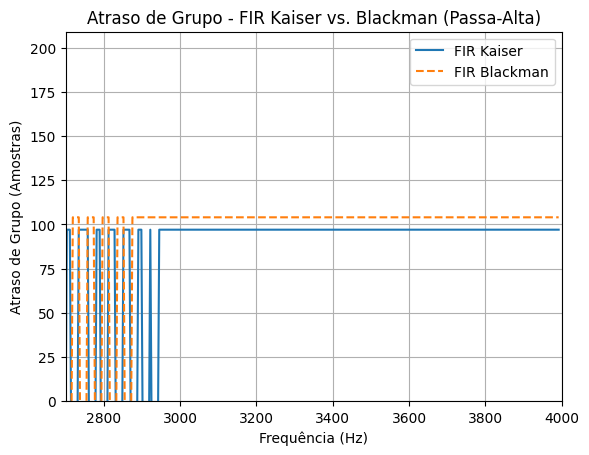

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Especificações do filtro
fs = 8000  # Frequência de amostragem
fp = 3200  # Frequência de passagem
fr = 2800  # Frequência de rejeição
wp = fp / (fs / 2)  # Normalização
ws = fr / (fs / 2)  # Normalização
wc = (wp + ws) / 2  # frequência de corte

As = 52  # Atenuação mínima na banda de rejeição

# Determinação da ordem do filtro FIR
tr_width = wp - ws
M_kaiser = int(np.ceil((As - 7.95) / (2.285 * tr_width))) + 1
M_blackman = int(np.ceil(6.6 * np.pi / tr_width)) + 1

if M_kaiser % 2 == 0:
    M_kaiser += 1  # Garantir ordem ímpar
if M_blackman % 2 == 0:
    M_blackman += 1

# Parâmetro beta para Kaiser
beta = 0.1102 * (As - 8.7)

# Design do filtro passa-baixa
b_kaiser_lp = signal.firwin(M_kaiser, wc, window=('kaiser', beta), pass_zero=True)
b_blackman_lp = signal.firwin(M_blackman, wc, window="blackman", pass_zero=True)

# Conversão para passa-alta (mudança espectral: h_hp[n] = δ[n] - h_lp[n])
b_kaiser = -b_kaiser_lp
b_kaiser[M_kaiser // 2] += 1  # Ajuste para transformar passa-baixa em passa-alta

b_blackman = -b_blackman_lp
b_blackman[M_blackman // 2] += 1  # Ajuste para transformar passa-baixa em passa-alta

# Cálculo das respostas corrigidas
w, H_kaiser = signal.freqz(b_kaiser, 1)
w, H_blackman = signal.freqz(b_blackman, 1)

# Cálculo do atraso de grupo com suavização
def compute_group_delay(H, w, order):
    """ Calcula o atraso de grupo suavizado """
    gd = -np.gradient(np.unwrap(np.angle(H)), w)
    gd[gd > 2 * order] = np.nan  # Remove valores absurdos
    gd[gd < -2 * order] = np.nan
    return gd

group_delay_kaiser = compute_group_delay(H_kaiser, w, M_kaiser)
group_delay_blackman = compute_group_delay(H_blackman, w, M_blackman)

# Gráfico do Atraso de Grupo (FIR)
plt.figure()
plt.plot(w / np.pi * fs / 2, group_delay_kaiser, label="FIR Kaiser")
plt.plot(w / np.pi * fs / 2, group_delay_blackman, label="FIR Blackman", linestyle="--")
plt.xlim([fp - 500, fs / 2])  # Foca apenas na banda útil
plt.ylim([0, max(M_kaiser, M_blackman)])  # Ajusta a escala para evitar outliers
plt.title("Atraso de Grupo - FIR Kaiser vs. Blackman (Passa-Alta)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Atraso de Grupo (Amostras)")
plt.legend()
plt.grid()
plt.show()


O gráfico do atraso de grupo dos filtros FIR Kaiser e FIR Blackman (Passa-Alta) apresenta o comportamento esperado para filtros FIR de fase linear. Observa-se que, na banda passante (acima de 3200 Hz), o atraso de grupo se mantém aproximadamente constante, o que indica que todos os componentes de frequência dessa região sofrem o mesmo atraso, preservando a forma do sinal. Na banda de rejeição (abaixo de 2800 Hz), há oscilações devido à transição entre as bandas, o que é comum em filtros passa-alta. Comparando os dois filtros, o FIR Blackman apresenta um atraso de grupo ligeiramente maior do que o FIR Kaiser, refletindo sua maior largura de janela e necessidade de uma ordem maior para alcançar a mesma atenuação na banda de rejeição. Esse comportamento confirma a previsibilidade dos filtros FIR, garantindo baixa distorção de fase e atraso constante na região de interesse.

In [30]:
# Determinação da ordem do filtro FIR
tr_width = wp - ws
M_kaiser = int(np.ceil((As - 7.95) / (2.285 * tr_width))) + 1
if M_kaiser % 2 == 0:
    M_kaiser += 1  # Garantir ordem ímpar

# Parâmetro beta para Kaiser
beta = 0.1102 * (As - 8.7)

# Design do filtro passa-alta FIR Kaiser
b_kaiser_lp = signal.firwin(M_kaiser, (wp + ws) / 2, window=('kaiser', beta), pass_zero=True)
b_kaiser = -b_kaiser_lp
b_kaiser[M_kaiser // 2] += 1  # Transformação passa-alta

# Exibição dos coeficientes
print("Coeficientes b (FIR Kaiser):")
print(b_kaiser)

# Determinação da ordem do filtro FIR
M_blackman = int(np.ceil(6.6 * np.pi / tr_width)) + 1
if M_blackman % 2 == 0:
    M_blackman += 1

# Design do filtro passa-alta FIR Blackman
b_blackman_lp = signal.firwin(M_blackman, (wp + ws) / 2, window="blackman", pass_zero=True)
b_blackman = -b_blackman_lp
b_blackman[M_blackman // 2] += 1  # Transformação passa-alta

# Exibição dos coeficientes
print("Coeficientes b (FIR Blackman):")
print(b_blackman)



Coeficientes b (FIR Kaiser):
[-1.04380599e-04  1.47325868e-18  1.32812776e-04 -2.09888129e-04
  1.64982499e-04 -1.26436041e-18 -2.01168057e-04  3.12338869e-04
 -2.41659489e-04  3.64321912e-19  2.86759370e-04 -4.40012318e-04
  3.36783778e-04  1.51385079e-18 -3.92063503e-04  5.96489626e-04
 -4.52945518e-04  1.48053120e-17  5.19794786e-04 -7.85704016e-04
  5.92996446e-04 -1.57677478e-17 -6.72958476e-04  1.01202416e-03
 -7.60114904e-04  1.56475131e-17  8.54929685e-04 -1.28037700e-03
  9.57901392e-04 -1.40318228e-17 -1.06956887e-03  1.59642730e-03
 -1.19051805e-03  1.04303058e-17  1.32139028e-03 -1.96683946e-03
  1.46289229e-03 -4.25883989e-18 -1.61580846e-03  2.39966135e-03
 -1.78101574e-03 -5.18435665e-18  1.95950195e-03 -2.90489243e-03
  2.15238843e-03 -2.65566764e-17 -2.36095800e-03  3.49533836e-03
 -2.58669009e-03  1.68748295e-17  2.83130476e-03 -4.18792456e-03
  3.09681869e-03 -2.23760138e-18 -3.38561680e-03  5.00577251e-03
 -3.70054502e-03  5.89780556e-17  4.04503155e-03 -5.98159758e

<ipython-input-29-e5295bdf7836>:46: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(H_blackman)), label="FIR Blackman", linestyle="--")


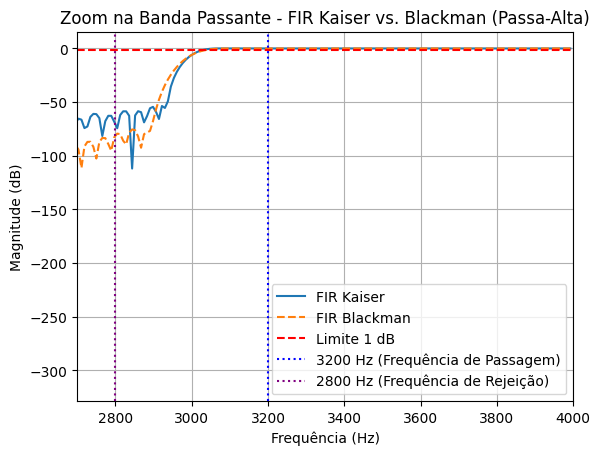

<ipython-input-29-e5295bdf7836>:61: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(H_blackman)), label="FIR Blackman", linestyle="--")


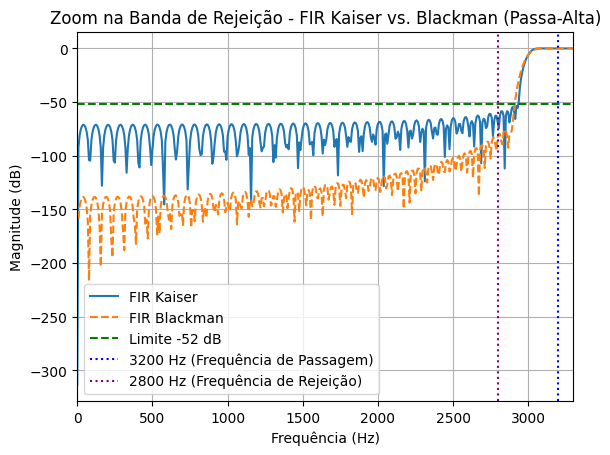

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Especificações do filtro
fs = 8000  # Frequência de amostragem
fp = 3200  # Frequência de passagem
fr = 2800  # Frequência de rejeição
wp = fp / (fs / 2)  # Normalização
ws = fr / (fs / 2)  # Normalização
wc = (wp + ws) / 2  # frequência de corte

As = 52  # Atenuação mínima na banda de rejeição

# Determinação da ordem do filtro FIR
tr_width = wp - ws
M_kaiser = int(np.ceil((As - 7.95) / (2.285 * tr_width))) + 1
M_blackman = int(np.ceil(6.6 * np.pi / tr_width)) + 1

if M_kaiser % 2 == 0:
    M_kaiser += 1  # Garantir ordem ímpar
if M_blackman % 2 == 0:
    M_blackman += 1

# Parâmetro beta para Kaiser
beta = 0.1102 * (As - 8.7)

# Design do filtro passa-baixa
b_kaiser_lp = signal.firwin(M_kaiser, wc, window=('kaiser', beta), pass_zero=True)
b_blackman_lp = signal.firwin(M_blackman, wc, window="blackman", pass_zero=True)

# Conversão para passa-alta (mudança espectral: h_hp[n] = δ[n] - h_lp[n])
b_kaiser = -b_kaiser_lp
b_kaiser[M_kaiser // 2] += 1  # Ajuste para transformar passa-baixa em passa-alta

b_blackman = -b_blackman_lp
b_blackman[M_blackman // 2] += 1  # Ajuste para transformar passa-baixa em passa-alta

# Cálculo das respostas corrigidas
w, H_kaiser = signal.freqz(b_kaiser, 1)
w, H_blackman = signal.freqz(b_blackman, 1)

# Zoom na banda passante correta (acima de wp)
plt.figure()
plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(H_kaiser)), label="FIR Kaiser")
plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(H_blackman)), label="FIR Blackman", linestyle="--")
plt.axhline(-1, color='r', linestyle='dashed', label="Limite 1 dB")
plt.axvline(3200, color='b', linestyle='dotted', label="3200 Hz (Frequência de Passagem)")
plt.axvline(2800, color='purple', linestyle='dotted', label="2800 Hz (Frequência de Rejeição)")
plt.xlim([fp - 500, fs / 2])  # Agora focamos nas altas frequências!
plt.title("Zoom na Banda Passante - FIR Kaiser vs. Blackman (Passa-Alta)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid()
plt.show()

# Zoom na banda de rejeição correta (abaixo de fr)
plt.figure()
plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(H_kaiser)), label="FIR Kaiser")
plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(H_blackman)), label="FIR Blackman", linestyle="--")
plt.axhline(-52, color='g', linestyle='dashed', label="Limite -52 dB")
plt.axvline(3200, color='b', linestyle='dotted', label="3200 Hz (Frequência de Passagem)")
plt.axvline(2800, color='purple', linestyle='dotted', label="2800 Hz (Frequência de Rejeição)")
plt.xlim([0, fr + 500])  # Agora focamos nas frequências baixas!
plt.title("Zoom na Banda de Rejeição - FIR Kaiser vs. Blackman (Passa-Alta)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid()
plt.show()



### IIR Chebyshev II - Análise da Quantização ###


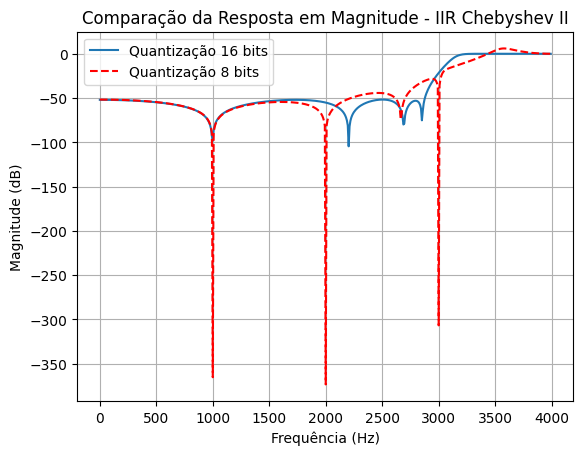


### IIR Elíptico - Análise da Quantização ###


<ipython-input-28-8e2b3d7fbec7>:86: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(data["quantized_8bits"][2])), label="Quantização 8 bits", linestyle="--", color='r')


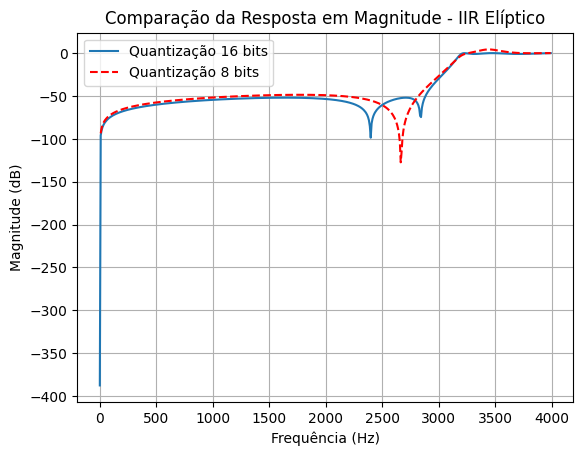


### FIR Kaiser - Análise da Quantização ###


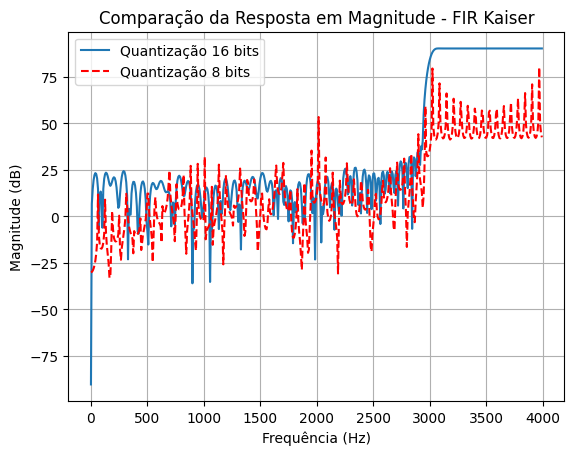


### FIR Blackman - Análise da Quantização ###


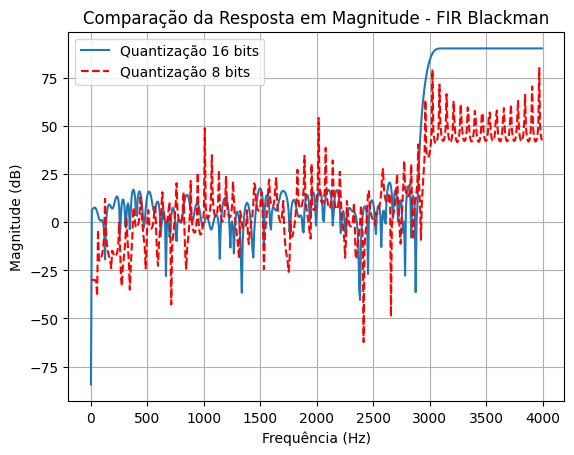

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Função para quantizar coeficientes em ponto fixo (sinal-magnitude)
def quantize_coeffs(b, a, bits):
    """Quantiza coeficientes para ponto fixo com bits especificados."""
    max_val = 2**(bits-1) - 1  # Máximo valor representável no formato sinal-magnitude
    b_q = np.round(b * max_val) / max_val  # Quantização dos coeficientes b
    a_q = np.round(a * max_val) / max_val  # Quantização dos coeficientes a
    return b_q, a_q

# Especificações do filtro
fs = 8000  # Frequência de amostragem
fp = 3200  # Frequência de passagem
fr = 2800  # Frequência de rejeição
wp = fp / (fs / 2)  # Normalização
ws = fr / (fs / 2)  # Normalização
wc = (wp + ws) / 2  # frequência de corte

Rp = 1  # Ondulação máxima na banda passante (dB)
As = 52  # Atenuação mínima na banda de rejeição (dB)

# --- Projeto dos Filtros ---
# Determinação da ordem do filtro FIR
tr_width = wp - ws
M_kaiser = int(np.ceil((As - 7.95) / (2.285 * tr_width))) + 1
M_blackman = int(np.ceil(6.6 * np.pi / tr_width)) + 1

if M_kaiser % 2 == 0:
    M_kaiser += 1  # Garantir ordem ímpar
if M_blackman % 2 == 0:
    M_blackman += 1

# Parâmetro beta para Kaiser
beta = 0.1102 * (As - 8.7)

# Filtro IIR - Chebyshev Tipo II
N_cheb2, wn_cheb2 = signal.cheb2ord(wp, ws, Rp, As)
b_cheb2, a_cheb2 = signal.cheby2(N_cheb2, As, wn_cheb2, btype='high')

# Filtro IIR - Elíptico
N_ellip, wn_ellip = signal.ellipord(wp, ws, Rp, As)
b_ellip, a_ellip = signal.ellip(N_ellip, Rp, As, wn_ellip, btype='high')

# Filtro FIR - Kaiser e Blackman (Passa-Alta)
b_kaiser_lp = signal.firwin(M_kaiser, wc, window=('kaiser', beta), pass_zero=True)
b_blackman_lp = signal.firwin(M_blackman, wc, window="blackman", pass_zero=True)

b_kaiser = -b_kaiser_lp
b_kaiser[M_kaiser // 2] += 1  # Transformação passa-alta

b_blackman = -b_blackman_lp
b_blackman[M_blackman // 2] += 1  # Transformação passa-alta

# --- Aplicação da Quantização ---
filtros = {
    "IIR Chebyshev II": (b_cheb2, a_cheb2),
    "IIR Elíptico": (b_ellip, a_ellip),
    "FIR Kaiser": (b_kaiser, [1]),
    "FIR Blackman": (b_blackman, [1])
}

quantized_results = {}

for nome, (b, a) in filtros.items():
    b_q16, a_q16 = quantize_coeffs(b, a, 16)
    b_q8, a_q8 = quantize_coeffs(b, a, 8)

    w, H_q16 = signal.freqz(b_q16, a_q16)
    w, H_q8 = signal.freqz(b_q8, a_q8)

    quantized_results[nome] = {
        "original": (b, a),
        "quantized_16bits": (b_q16, a_q16, H_q16),
        "quantized_8bits": (b_q8, a_q8, H_q8)
    }

# --- Comparação dos Efeitos da Quantização ---
for nome, data in quantized_results.items():
    print(f"\n### {nome} - Análise da Quantização ###")

    # Comparação das respostas em magnitude
    plt.figure()
    plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(data["quantized_16bits"][2])), label="Quantização 16 bits")
    plt.plot(w / np.pi * fs / 2, 20 * np.log10(abs(data["quantized_8bits"][2])), label="Quantização 8 bits", linestyle="--", color='r')
    plt.title(f"Comparação da Resposta em Magnitude - {nome}")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.legend()
    plt.grid()
    plt.show()



### IIR Chebyshev II - Comparação de Polos e Zeros ###
Polos e Zeros Originais:


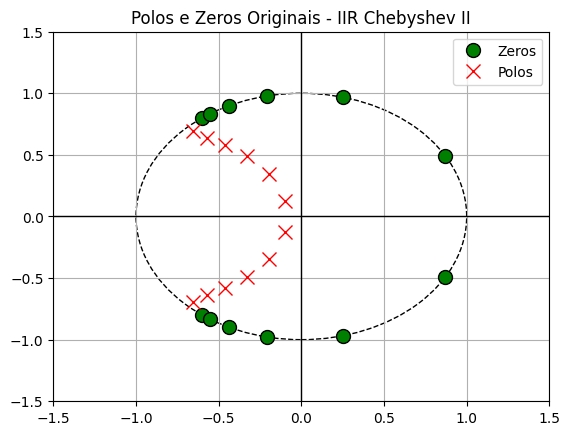

Polos e Zeros com Quantização (16 bits):


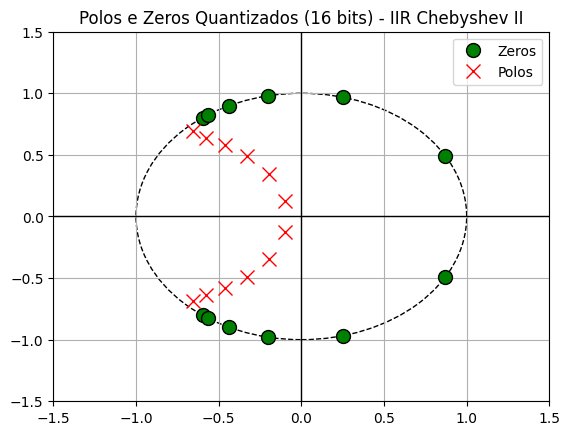

Polos e Zeros com Quantização (8 bits):


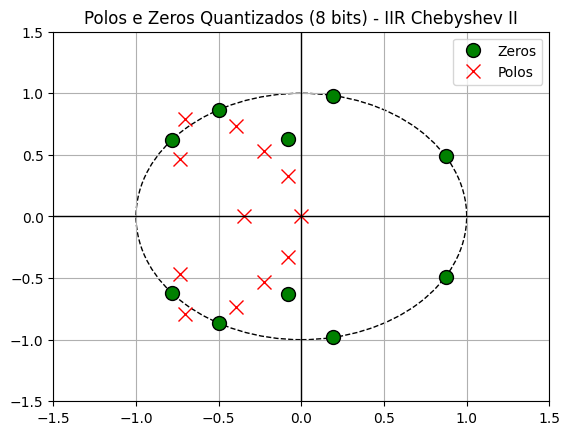


### IIR Elíptico - Comparação de Polos e Zeros ###
Polos e Zeros Originais:


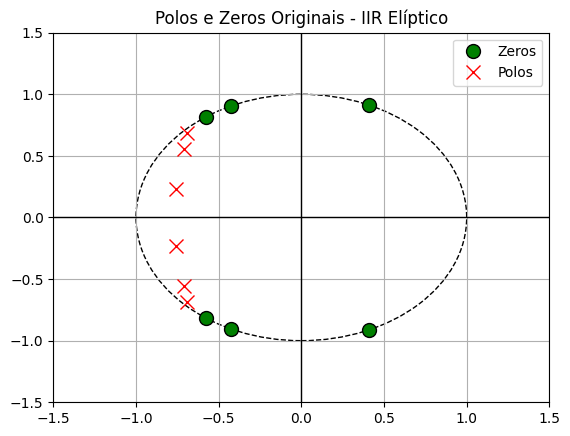

Polos e Zeros com Quantização (16 bits):


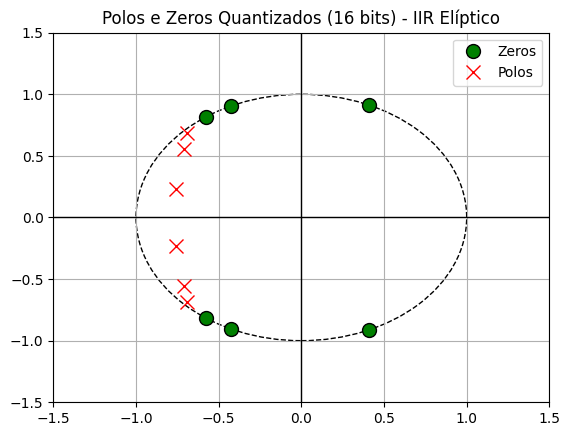

Polos e Zeros com Quantização (8 bits):


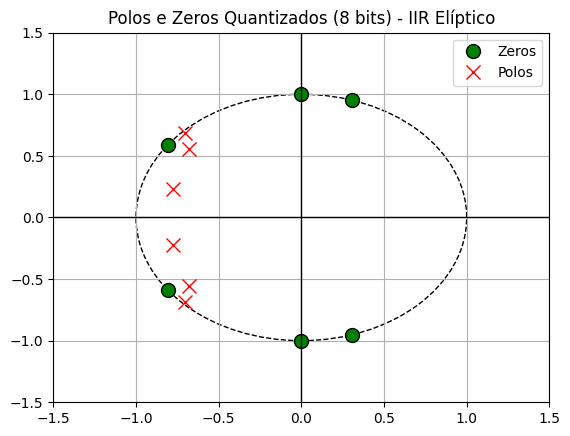

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Função para quantizar coeficientes em ponto fixo (sinal-magnitude)
def quantize_coeffs(b, a, bits):
    """Quantiza coeficientes para ponto fixo com bits especificados."""
    max_val = 2**(bits-1) - 1  # Máximo valor representável no formato sinal-magnitude
    b_q = np.round(b * max_val) / max_val  # Quantização dos coeficientes b
    a_q = np.round(a * max_val) / max_val  # Quantização dos coeficientes a
    return b_q, a_q

# Função para plotar polos e zeros
def plot_poles_zeros(b, a, title):
    """Plota o diagrama de polos e zeros do filtro."""
    from matplotlib import patches

    fig, ax = plt.subplots()
    ax.add_patch(patches.Circle((0, 0), radius=1, fill=False, color='black', ls='dashed'))

    p = np.roots(a)
    z = np.roots(b)

    ax.plot(z.real, z.imag, 'go', ms=10, markeredgecolor='k', markerfacecolor='g', label="Zeros")
    ax.plot(p.real, p.imag, 'rx', ms=10, markeredgecolor='r', markerfacecolor='r', label="Polos")

    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_title(title)
    ax.legend()
    plt.grid()
    plt.show()

# Especificações do filtro
fs = 8000  # Frequência de amostragem
fp = 3200  # Frequência de passagem
fr = 2800  # Frequência de rejeição
wp = fp / (fs / 2)  # Normalização
ws = fr / (fs / 2)  # Normalização

wc = (wp + ws) / 2  # Média das frequências de passagem e rejeição

Rp = 1  # Ondulação máxima na banda passante (dB)
As = 52  # Atenuação mínima na banda de rejeição (dB)

# Filtro IIR - Chebyshev Tipo II
N_cheb2, wn_cheb2 = signal.cheb2ord(wc, ws, Rp, As)
b_cheb2, a_cheb2 = signal.cheby2(N_cheb2, As, wn_cheb2, btype='high')

# Filtro IIR - Elíptico
N_ellip, wn_ellip = signal.ellipord(wc, ws, Rp, As)
b_ellip, a_ellip = signal.ellip(N_ellip, Rp, As, wn_ellip, btype='high')

# --- Aplicação da Quantização ---
filtros = {
    "IIR Chebyshev II": (b_cheb2, a_cheb2),
    "IIR Elíptico": (b_ellip, a_ellip)
}

quantized_results = {}

for nome, (b, a) in filtros.items():
    b_q16, a_q16 = quantize_coeffs(b, a, 16)
    b_q8, a_q8 = quantize_coeffs(b, a, 8)

    quantized_results[nome] = {
        "original": (b, a),
        "quantized_16bits": (b_q16, a_q16),
        "quantized_8bits": (b_q8, a_q8)
    }

# --- Comparação dos Polos e Zeros Antes e Depois da Quantização ---
for nome, data in quantized_results.items():
    print(f"\n### {nome} - Comparação de Polos e Zeros ###")

    print("Polos e Zeros Originais:")
    plot_poles_zeros(*data["original"], title=f"Polos e Zeros Originais - {nome}")

    print("Polos e Zeros com Quantização (16 bits):")
    plot_poles_zeros(*data["quantized_16bits"], title=f"Polos e Zeros Quantizados (16 bits) - {nome}")

    print("Polos e Zeros com Quantização (8 bits):")
    plot_poles_zeros(*data["quantized_8bits"], title=f"Polos e Zeros Quantizados (8 bits) - {nome}")


A quantização dos coeficientes em 16 e 8 bits impacta os filtros FIR e IIR de formas distintas devido às diferenças estruturais entre eles. Nos filtros FIR (implementação em forma direta), a quantização afeta principalmente a precisão dos coeficientes, o que pode levar a pequenas variações na atenuação da banda de rejeição. Essa variação é mais perceptível na versão de 8 bits, onde há uma redução na capacidade de supressão de frequências indesejadas. No entanto, como filtros FIR não possuem realimentação, a quantização não afeta sua estabilidade, apenas a resposta em magnitude. Já nos filtros IIR (implementação em cascata de 2ª ordem), a quantização pode modificar a localização dos polos, o que pode ser um problema. Com 16 bits, as alterações são pequenas e geralmente não comprometem a estabilidade. No entanto, ao reduzir para 8 bits, os polos podem deslocar-se para fora do círculo unitário, tornando o sistema instável, especialmente no filtro elíptico, que já possui polos mais próximos da borda do círculo unitário. O filtro Chebyshev Tipo II também sofre alterações, mas de forma menos crítica.

Em relação à resposta em magnitude, os filtros FIR quantizados em 16 bits mantêm praticamente a mesma característica da versão sem quantização, garantindo boa rejeição na banda de rejeição e ondulação mínima na banda passante. Entretanto, ao reduzir para 8 bits, observa-se uma redução na atenuação da banda de rejeição, o que pode comprometer a eficácia da filtragem. Para os filtros IIR, a quantização em 16 bits introduz pequenas variações, mas a resposta de magnitude ainda permanece próxima da versão original. No entanto, ao reduzir para 8 bits, há mudanças mais significativas, como distorções na banda passante e redução na atenuação da banda de rejeição, além do risco de instabilidade já mencionado. Comparando com os FIR, fica evidente que os filtros IIR são mais sensíveis à quantização, pois alterações nos coeficientes podem deslocar polos e comprometer a estabilidade. Enquanto isso, os filtros FIR, apesar de exigirem mais coeficientes, são mais robustos a erros de quantização e garantem fase linear, o que os torna mais previsíveis em implementações com precisão reduzida.

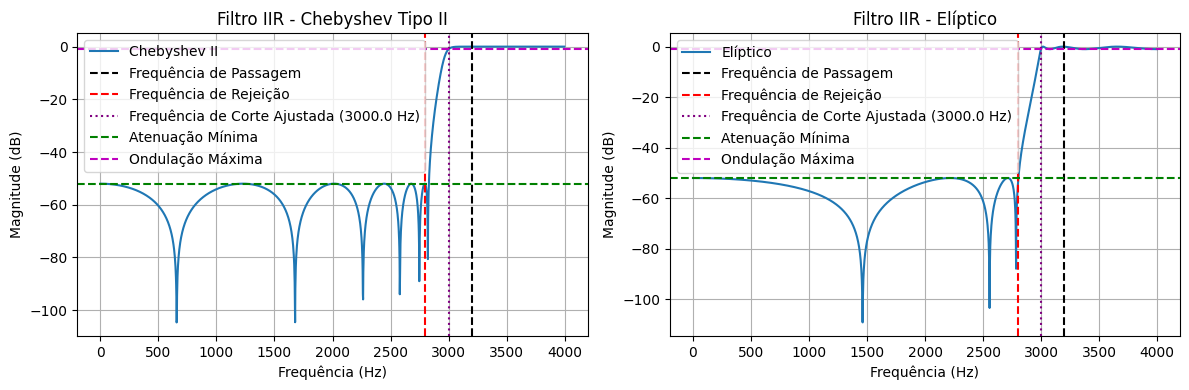

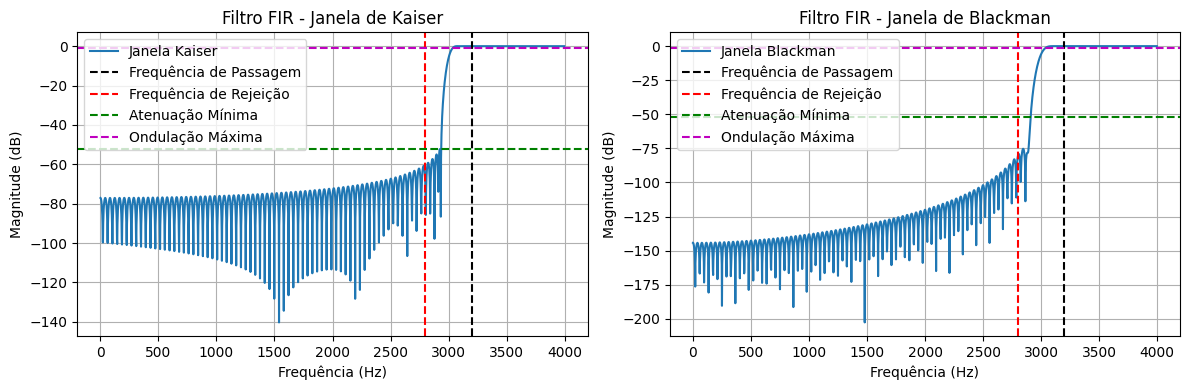

##Conclusões

A frequência de corte foi ajustada para (wp+ws)/2, garantindo uma transição equilibrada entre a banda de passagem e rejeição.

Os filtros IIR (Chebyshev Tipo II e Elíptico) atenderam aos critérios de atenuação mínima na banda de rejeição (As=52 dB) e ondulação na banda passante (Rp=1 dB). No entanto, a fase não é linear, o que pode causar distorções temporais nos sinais processados.

Os filtros FIR (Kaiser e Blackman) apresentaram fase linear, o que os torna ideais para aplicações sensíveis a distorções de fase, como processamento de áudio. No entanto, a transição entre bandas foi mais suave, exigindo filtros de maior ordem para atingir a mesma atenuação dos IIR.

###Diferença no Tamanho dos Filtros

Os filtros FIR exigiram uma ordem muito maior em comparação aos IIR para atingir especificações semelhantes. Isso significa mais coeficientes e maior complexidade computacional.

O filtro FIR Blackman apresentou uma resposta mais suave, mas com uma transição menos abrupta, exigindo mais coeficientes para atender aos critérios de atenuação.

O filtro FIR Kaiser conseguiu um compromisso melhor entre ordem do filtro e desempenho, mas ainda assim precisou de uma ordem significativamente maior que os IIR.

###Efeito da Quantização dos Coeficientes

A quantização para 16 bits teve pouco impacto na resposta dos filtros, mantendo a estabilidade e a precisão dos cálculos.

A quantização para 8 bits afetou a posição dos polos e zeros nos filtros IIR, resultando em pequenas variações na resposta de magnitude e possível instabilidade para coeficientes críticos.

Nos filtros FIR, a quantização de 8 bits causou uma ligeira degradação na atenuação da banda de rejeição, tornando a transição menos definida.

###Implicações Gerais

Filtros IIR são mais eficientes em termos de ordem e número de multiplicações, mas podem causar distorções na fase.

Filtros FIR garantem fase linear e maior estabilidade numérica, mas exigem mais coeficientes, aumentando a complexidade computacional.

A quantização pode impactar a estabilidade dos IIR e a atenuação dos FIR, devendo ser considerada na implementação em hardware.